<a href="https://colab.research.google.com/github/vanshikapringle/SCT_DS_3/blob/main/Task_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1201
           1       0.57      0.32      0.41       156

    accuracy                           0.89      1357
   macro avg       0.75      0.64      0.68      1357
weighted avg       0.88      0.89      0.88      1357

Accuracy: 0.894620486366986


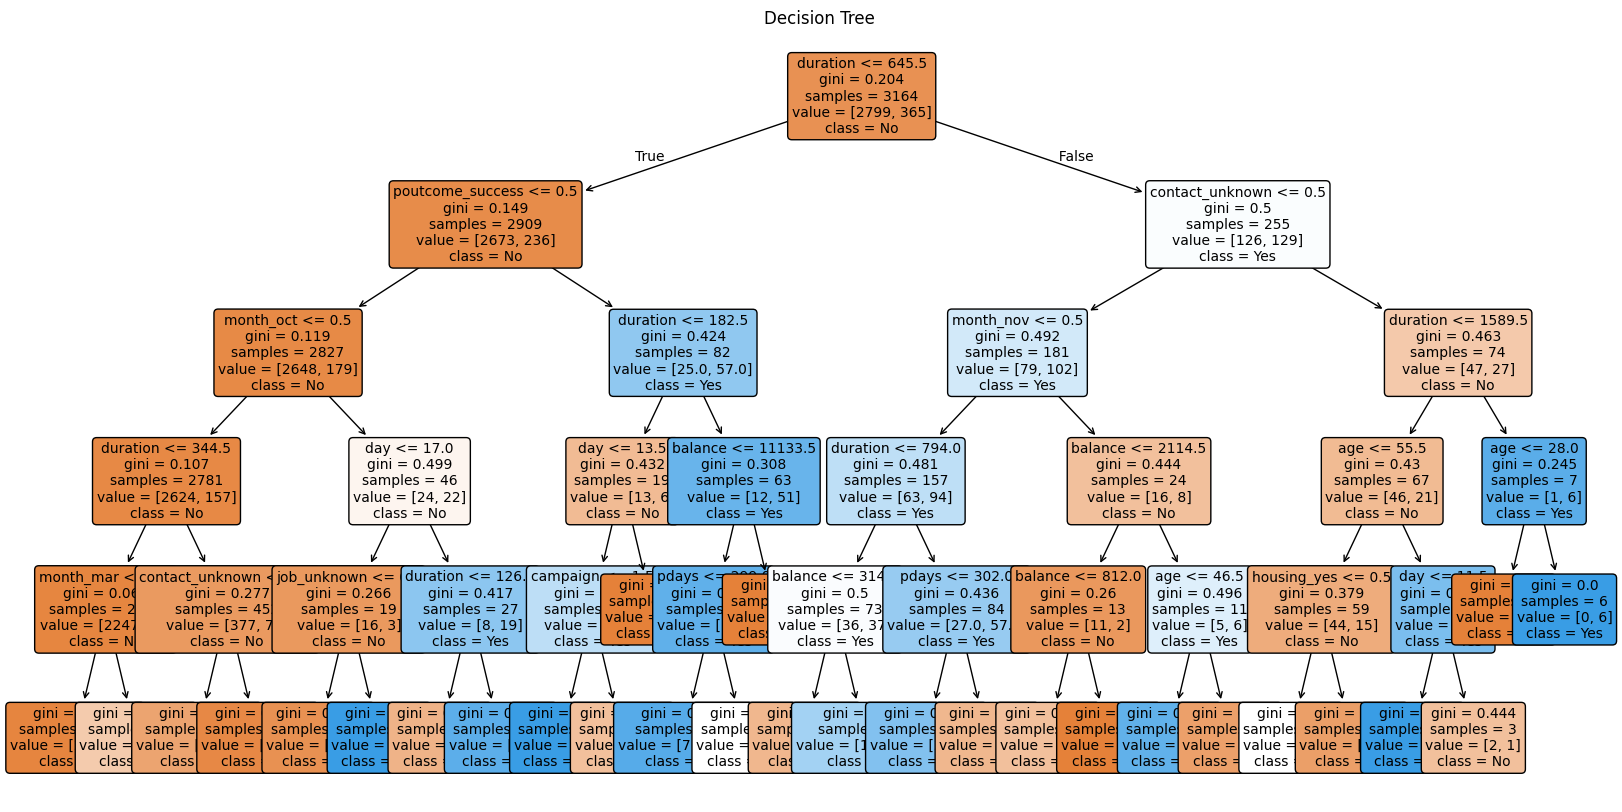

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('bank.csv', sep=';')

# Step 2: Encode the target variable
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Step 3: One-hot encode all categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns  # No need to drop 'y' here
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 4: Split the data
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 5: Train Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Step 7: Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model,
          feature_names=X.columns,
          class_names=['No', 'Yes'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree")
plt.show()

